In [72]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [73]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [74]:
df.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [76]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [77]:
(df.isna()).sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

So there is no 'Not Available' value present here.

In [78]:
df.corr()["DEATH_EVENT"].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

### Data Visualization

In [79]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [80]:
import sys
sys.path

['/Users/smriti/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/WKWSCI_MMC Semesters/Semester 2/Information Mining and Analysis/Lab Notebook Resources/Final Project/only for report writing/Code Files',
 '/Users/smriti/opt/anaconda3/lib/python39.zip',
 '/Users/smriti/opt/anaconda3/lib/python3.9',
 '/Users/smriti/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/smriti/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/aeosa']

In [82]:
import matplotlib.pyplot as plt

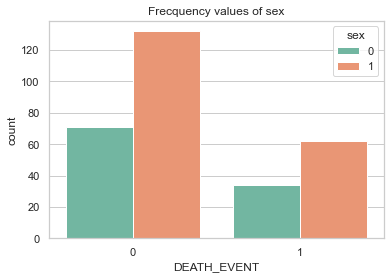

In [83]:
sns.countplot(x ='DEATH_EVENT', hue = "sex", data = df, palette = "Set2")
plt.title('Frecquency values of sex')
plt.show()

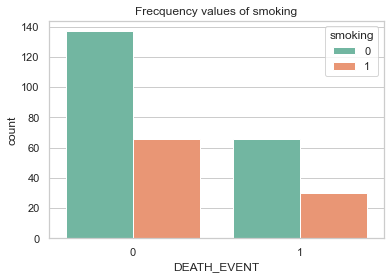

In [84]:
sns.countplot(x ='DEATH_EVENT', hue = "smoking", data = df, palette = "Set2")
plt.title('Frecquency values of smoking')
plt.show()

<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>

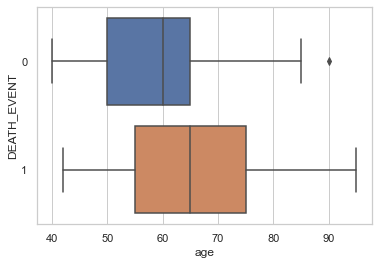

In [85]:
sns.boxplot(data=df, y='DEATH_EVENT', x='age', orient='h')

<AxesSubplot:xlabel='ejection_fraction', ylabel='DEATH_EVENT'>

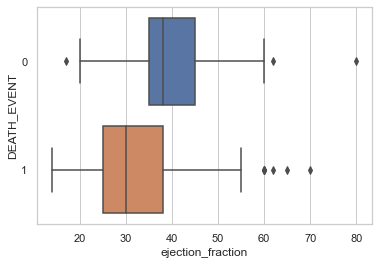

In [86]:
sns.boxplot(data=df, y='DEATH_EVENT', x='ejection_fraction', orient='h')

### PCA Analysis & Logistic Regression to Understand Relationship Between Variables

In [87]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from seaborn import load_dataset, pairplot
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [88]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [ ]:
df.shape

In [89]:
N_COMPONENTS = 5
# The target feature is whether or not the employee left.
TARGET_FEATURE = 'DEATH_EVENT'  # Valid data values are 0 or 1.

# We'll set aside 20% of the data to test the model.
TEST_SET_SIZE = 0.2

In [90]:
#Set up the data for PCA
# Separate the X and Y values.
df_x = df.drop(columns=['DEATH_EVENT'])
df_y = df[['DEATH_EVENT']]

In [91]:
x_train, x_test, y_train, y_test = train_test_split(
    df_x,
    df_y,
    test_size=TEST_SET_SIZE
)
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (239, 12)
Testing data shape: (60, 12)


In [92]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.375442
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.416     
Dependent Variable:    DEATH_EVENT        AIC:                203.4614  
Date:                  2022-11-30 20:52   BIC:                245.1790  
No. Observations:      239                Log-Likelihood:     -89.731   
Df Model:              11                 LL-Null:            -153.69   
Df Residuals:          227                LLR p-value:        4.5750e-22
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
age                       0.0541   0.0180  3.0030 0

In [93]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(x_train, y_train.values.ravel())

# Make predictions
y_pred = clf.predict(x_test) # Predictions
y_true = y_test # True values

In [94]:
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(x_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

Train accuracy: 0.82
Test accuracy: 0.88


/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


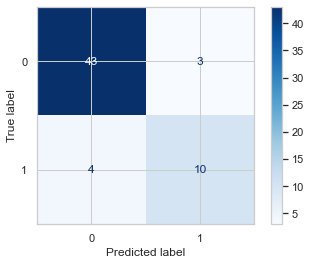

In [95]:
from sklearn.metrics import plot_confusion_matrix
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, x_test, y_test,
                                 cmap=plt.cm.Blues)
plt.pyplot.show(matrix)
plt.pyplot.show()

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



In [97]:
df_x1 = df[['age','ejection_fraction','serum_creatinine', 'time']]
df_y1 = df['DEATH_EVENT']

In [98]:
x1_train, x1_test, y1_train, y1_test = train_test_split(
    df_x1,
    df_y1,
    test_size=TEST_SET_SIZE
)
print('Traning data shape:', x1_train.shape)
print('Testing data shape:', x1_test.shape)

Traning data shape: (239, 4)
Testing data shape: (60, 4)


In [99]:
logit_model=sm.Logit(df_y1, df_x1)
result1=logit_model.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.379002
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.396     
Dependent Variable: DEATH_EVENT      AIC:              234.6432  
Date:               2022-11-30 20:52 BIC:              249.4449  
No. Observations:   299              Log-Likelihood:   -113.32   
Df Model:           3                LL-Null:          -187.67   
Df Residuals:       295              LLR p-value:      5.0117e-32
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age                0.0500   0.0098  5.1059 0.0000  0.0308  0.0691
ejection_fraction -0.0717   0.0145 -4.9382 0.0000 -0.1001 -0.0432


In [100]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(x1_train, y1_train.values.ravel())

# Make predictions
y_pred1 = clf.predict(x1_test) # Predictions
y_true1 = y1_test # True values

In [101]:
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y1_train, 
                                                 clf.predict(x1_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true1, y_pred1), 2))

Train accuracy: 0.84
Test accuracy: 0.83


/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


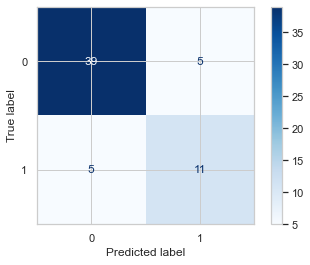

In [102]:
from sklearn.metrics import plot_confusion_matrix
# Generate confusion matrix
matrix1 = plot_confusion_matrix(clf, x1_test, y1_test,
                                 cmap=plt.cm.Blues)
plt.pyplot.show(matrix1)
plt.pyplot.show()

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        44
           1       0.69      0.69      0.69        16

    accuracy                           0.83        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.83      0.83      0.83        60



In [104]:
#fit the PCA model and get the PCA data
pca_model = decomposition.PCA(n_components=N_COMPONENTS)
pca_model.fit(df_x)
pca_df = pd.DataFrame(pca_model.transform(df_x))

print('Sample PCA data:')
print(pca_df.sample(5))
print('')

Sample PCA data:
                 0            1          2          3          4
174   17641.877129  -388.135435  15.126052   0.280401  -5.637972
127   36641.876966  -390.721712 -26.609059 -15.196572  15.743913
194 -137358.024813    33.486048  51.350787  22.685049   2.008756
153       0.307520  1264.180530  -9.953371   7.676797   6.737088
71  -141358.025544    34.521095 -57.882658   4.384335   3.982879



In [105]:
#Set up the data for PCA
# Separate the X and Y values.
df_x = df.drop(columns=['DEATH_EVENT'])
df_y = df[['DEATH_EVENT']]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(df_x)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

In [106]:
# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

Eigenvalues:
[1.66854625 1.5843945  1.27239806 1.11968295 1.03333917 0.99219419
 0.88632232 0.84812523 0.76658155 0.71018618 0.64617272 0.51232534]



In [107]:
# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[13.85804855 13.15912933 10.56785455  9.29948492  8.58235987  8.24063179
  7.36131691  7.04407243  6.36681441  5.89842483  5.36676343  4.25509899]



Text(0, 0.5, 'Explained variance (%)')

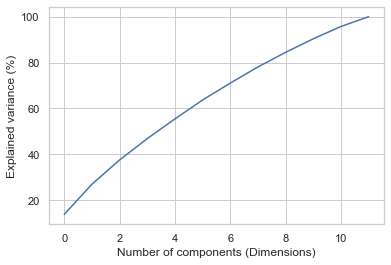

In [108]:
# Make the scree plot
plt.pyplot.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.pyplot.xlabel("Number of components (Dimensions)")
plt.pyplot.ylabel("Explained variance (%)")

### Support Vector Machine

In [109]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from seaborn import load_dataset, pairplot
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [110]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [111]:
X = df[['age', 'ejection_fraction', 'serum_creatinine', 'time']]
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [112]:
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8133


In [113]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.8267


In [114]:
clf = SVC(kernel='linear', C=100)
clf.fit(X_train, y_train)

SVC(C=100, kernel='linear')

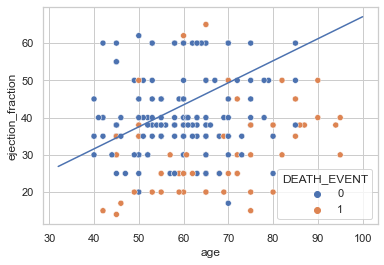

In [115]:
import numpy as np
from seaborn import scatterplot
w = clf.coef_[0]
b = clf.intercept_[0]
x_visual = np.linspace(32,100)
y_visual = -(w[0] / w[1]) * x_visual - b / w[1]

scatterplot(data = X_train, x='age', y='ejection_fraction', hue=y_train)
plt.pyplot.plot(x_visual, y_visual)
plt.pyplot.show()

In [ ]:
matrix = pd.DataFrame(data=df, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


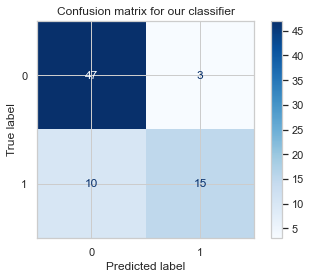

In [118]:
from sklearn.metrics import plot_confusion_matrix
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.pyplot.title('Confusion matrix for our classifier')
plt.pyplot.show(matrix)
plt.pyplot.show()

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        50
           1       0.83      0.60      0.70        25

    accuracy                           0.83        75
   macro avg       0.83      0.77      0.79        75
weighted avg       0.83      0.83      0.82        75



### Decision Tree Classifier

In [120]:
import numpy as np
import pandas as pd
import os
os.environ['PATH']

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


%matplotlib inline

import sklearn
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error

In [121]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

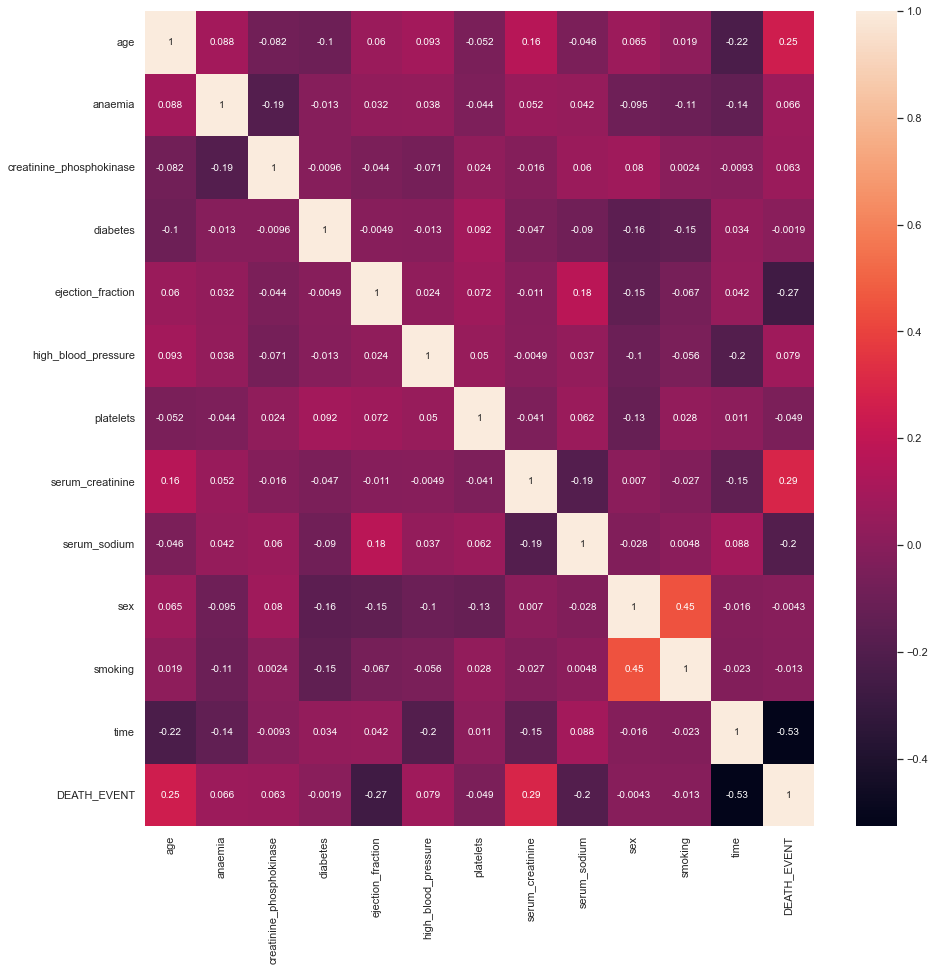

In [122]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

[0.09069157 0.02557073 0.07845862 0.03030732 0.12758731 0.02361557
 0.074253   0.12162642 0.0850795  0.0265602  0.02677119 0.28947857]


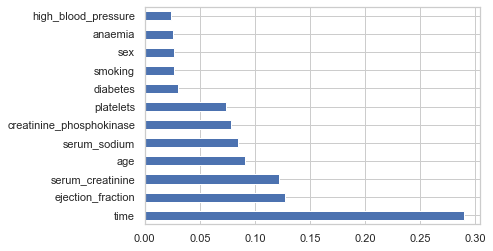

In [123]:
x = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

model = ExtraTreesClassifier()   #compute the importances of each feature.
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

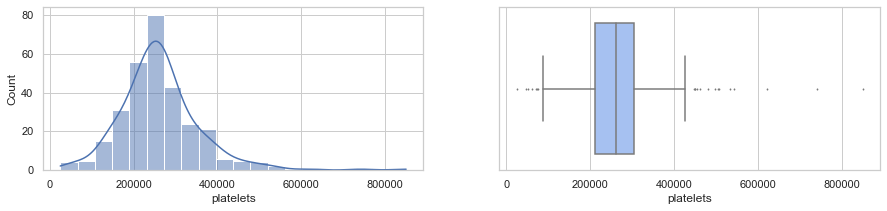

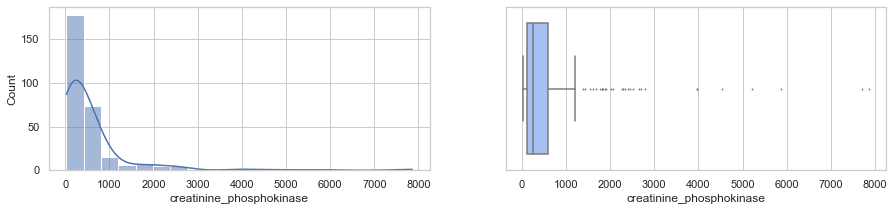

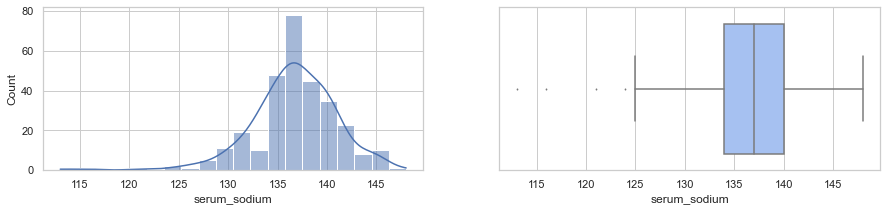

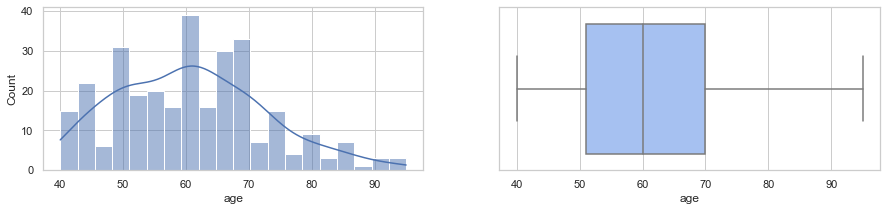

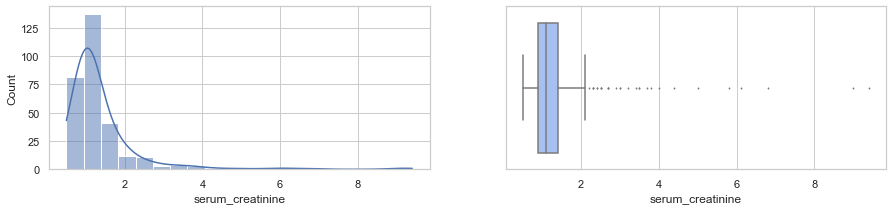

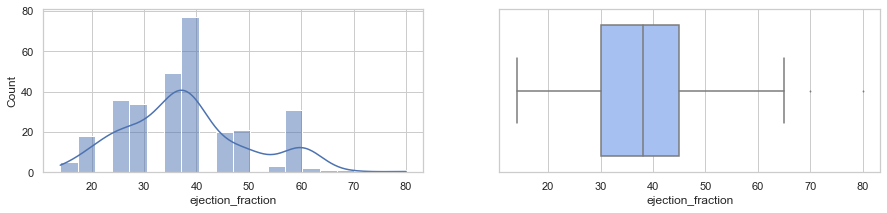

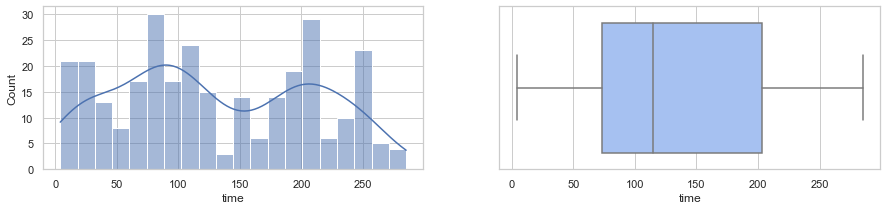

In [124]:
num_col = ["platelets","creatinine_phosphokinase","serum_sodium","age","serum_creatinine","ejection_fraction", "time"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

In [ ]:
df.describe()

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [130]:
data=df.copy() 

In [126]:
# define the quatiles of each feature.

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1
out_low = q1 - (IQR*1.5)
out_high = q3 + (IQR*1.5)
print(out_low)
print(out_high)

age                            22.50
anaemia                        -1.50
creatinine_phosphokinase     -581.75
diabetes                       -1.50
ejection_fraction               7.50
high_blood_pressure            -1.50
platelets                   76000.00
serum_creatinine                0.15
serum_sodium                  125.00
sex                            -1.50
smoking                        -1.50
time                         -122.00
DEATH_EVENT                    -1.50
dtype: float64
age                             98.50
anaemia                          2.50
creatinine_phosphokinase      1280.25
diabetes                         2.50
ejection_fraction               67.50
high_blood_pressure              2.50
platelets                   440000.00
serum_creatinine                 2.15
serum_sodium                   149.00
sex                              2.50
smoking                          2.50
time                           398.00
DEATH_EVENT                      2.50
dtype: flo

In [131]:
for feature in data:     #data set reshape
    data = data[(data[feature] >= out_low[feature]) &
                       (data[feature] <= out_high[feature]) ]

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       224 non-null    float64
 1   anaemia                   224 non-null    int64  
 2   creatinine_phosphokinase  224 non-null    int64  
 3   diabetes                  224 non-null    int64  
 4   ejection_fraction         224 non-null    int64  
 5   high_blood_pressure       224 non-null    int64  
 6   platelets                 224 non-null    float64
 7   serum_creatinine          224 non-null    float64
 8   serum_sodium              224 non-null    int64  
 9   sex                       224 non-null    int64  
 10  smoking                   224 non-null    int64  
 11  time                      224 non-null    int64  
 12  DEATH_EVENT               224 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 24.5 KB


/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

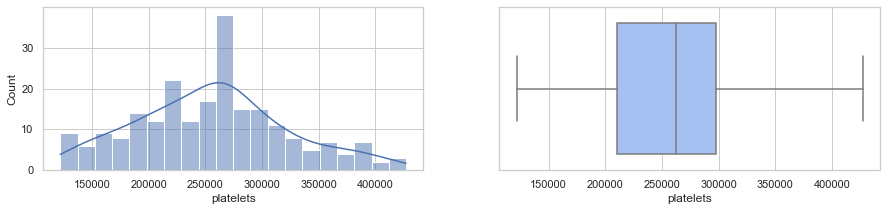

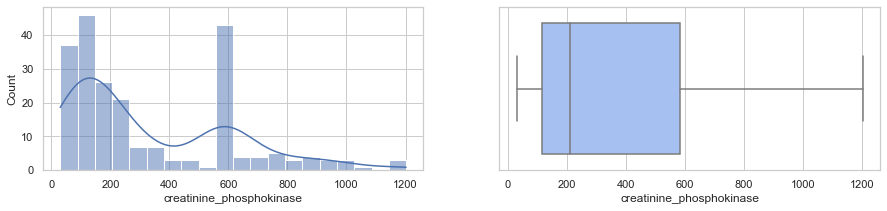

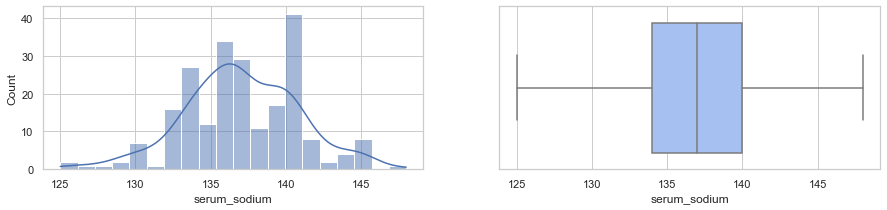

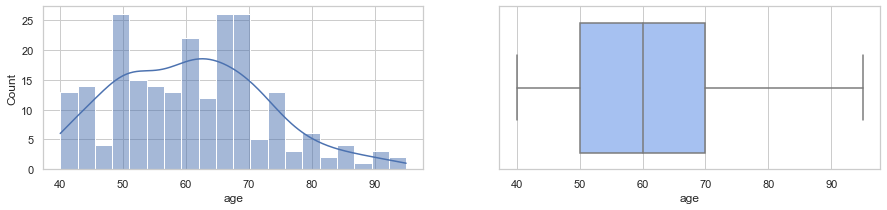

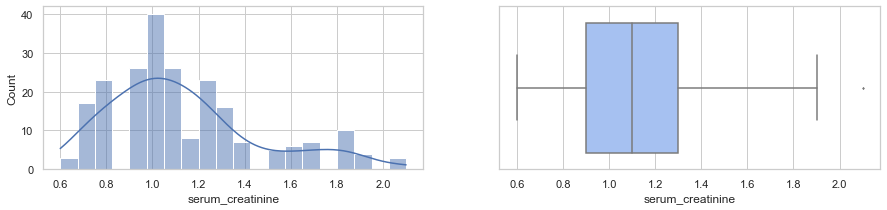

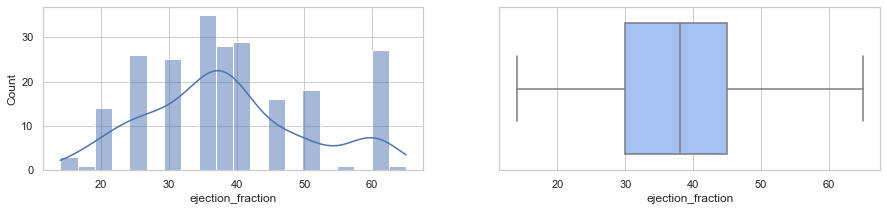

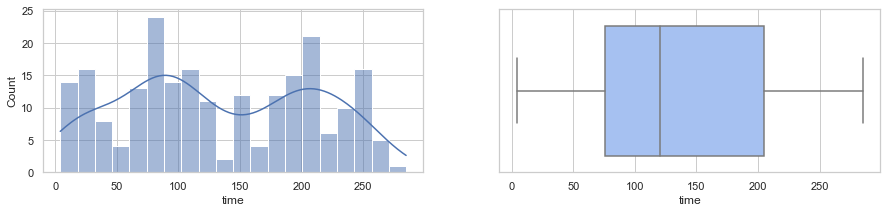

In [133]:
for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

In [134]:
## data preprocessing

inp_data = data[num_col]
out_data = data[['DEATH_EVENT']]

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=0)

## Applying Transformer
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [135]:
## X_train, X_test, y_train, y_test Shape

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (179, 7)
X_test Shape  :  (45, 7)
y_train Shape :  (179, 1)
y_test Shape  :  (45, 1)


In [136]:
#tree model fitting and training function,print out the parameters for model evaluation,
#as well as the confusion matrix and classfication report。
def result(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('Decision Tree Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
    print('Decision Tree Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
    print('Decision Tree Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
    print("Decision Tree Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
    print("\n",classification_report(y_pred, y_test))
    
    plt.figure(figsize=(6,6))
        
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, cmap="Blues",
                xticklabels=["FALSE","TRUE"],
                yticklabels=["FALSE","TRUE"],
                cbar=True)
    plt.title("DecisionTreeClassifier Confusion Matrix (Number)")
    plt.show()

In [137]:
#default hyperparameters of DecisionTreeClassifier.
#Use to test out the predict value's accurarcy according to test value.
def sample_result(class_weight=None,criterion="gini",max_depth=None,max_features=None,max_leaf_nodes=None,min_samples_split=2):    
    scores = [] 
    for i in range(0,2000): # 2000 samples
        X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2)
        clf = DecisionTreeClassifier(class_weight= class_weight,
                                     criterion=criterion,
                                     max_depth=max_depth,
                                     max_features=max_features,
                                     max_leaf_nodes=max_leaf_nodes,
                                     min_samples_split=min_samples_split) 
        sc=StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.fit_transform(X_test)
        
        clf.fit(X_train, y_train)
        scores.append(accuracy_score(clf.predict(X_test), y_test)) # accuracy_score(y_pred,y_test)
    
    plt.hist(scores)
    plt.show()
    print("Best Score: {}\nMean Score: {}".format(np.max(scores), np.mean(scores)))

In [138]:
#set the search range of hyperparameters. 
param_grid = {
    "max_depth": np.arange(1,10),
    "min_samples_split": [0.001, 0.01, 0.1, 2, 10, 100],
    "criterion": ["gini", "entropy"],
    "max_leaf_nodes": np.arange(2,10),
    "class_weight": ["balanced", None]
}                                              

clf = DecisionTreeClassifier(random_state=0)
grid = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=2, cv=10,error_score='raise')
grid.fit(X_train, y_train)
print("Param for GS", grid.best_params_)
print("CV score for GS", grid.best_score_)

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=1, max_leaf_nodes=2, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=1, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=1, max_leaf_nodes=2, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=1, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=1, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=1, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=1, max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=1, max_leaf_nodes=2, min_samples_

[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini

[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterio

[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gin

[CV] END class_weight=balanced, criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=7, max_leaf_nodes=6, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, crite

[CV] END class_weight=balanced, criterion=gini, max_depth=9, max_leaf_nodes=8, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=9, max_leaf_nodes=9, min_samples_split=0.001; total time=   0.0s
[CV] END class_wei

[CV] END class_weight=balanced, criterion=entropy, max_depth=3, max_leaf_nodes=2, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=3, max_leaf_nodes=2, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=3, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=3, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=3, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=3, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=3, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=3, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0

[CV] END class_weight=balanced, criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=4, max_leaf_nodes=8, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=0.01; total time=   0.0s
[CV] END clas

[CV] END class_weight=balanced, criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=0.01; total time=   0

[CV] END class_weight=balanced, criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=5, max_leaf_nodes=8, min_samples_split=100; total time=   0.0s
[CV] END c

[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=3, min_samples_split=0.1; total time=   0.0s
_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=7, max_leaf_nodes=9, min_samples_split=10; tot

[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=10; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=100; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=9, min_samples_split=100; total time=   0.0s
[CV] END c

[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=balanced, criterion=entropy, max_depth=9, max_leaf_nodes=8, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=2, max_leaf_nodes=3, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=2, max_leaf_nodes=3, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=2, max_leaf_nodes=3, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=2, max_leaf_nodes=3, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, 

[CV] END class_weight=None, criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, max_l

[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=2, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=2, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=2, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=2, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=2, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=2, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=2, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=2, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_lea

[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=7, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=7, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=7, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=7, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=7, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=7, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=7, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_leaf_nodes=7, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=3, max_lea

[CV] END class_weight=None, criterion=gini, max_depth=4, max_leaf_nodes=7, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=4, max_leaf_nodes=7, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=4, max_leaf_nodes=7, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=4, max_leaf_nodes=7, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=4, max_leaf_nodes=7, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=4, max_leaf_nodes=7, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=4, max_leaf_nodes=7, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=4, max_leaf_nodes=7, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=4, max_leaf_nodes=

[CV] END class_weight=None, criterion=gini, max_depth=6, max_leaf_nodes=2, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=6, max_leaf_nodes=2, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=6, max_leaf_nodes=3, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=6, max_leaf_nodes=3, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=6, max_leaf_nodes=3, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=6, max_leaf_nodes=3, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=6, max_leaf_nodes=3, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=6, max_leaf_nodes=3, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_dept

[CV] END class_weight=None, criterion=gini, max_depth=5, max_leaf_nodes=7, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=5, max_leaf_nodes=7, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=5, max_leaf_nodes=7, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=5, max_leaf_nodes=7, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=6, max_leaf_nodes=7, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=6, max_leaf_nodes=7, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=6, max_leaf_nodes=7, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=6, max_leaf_nodes=7, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=6, max_lea

[CV] END class_weight=None, criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_leaf_nodes=8, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=7, max_leaf_nodes=

[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8,

[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=8, max_leaf_nodes=9, min_s

[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=3, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=3, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=3, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=3, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=3, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=3, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=3, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=3, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None

[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=1, max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth

[CV] END class_weight=None, criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion

[CV] END class_weight=None, criterion=entropy, max_depth=4, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=4, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=4, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=4, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=4, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=4, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=4, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=4, max_leaf_nodes=2, min_samples_split=10; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, m

[CV] END class_weight=None, criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, m

[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=3, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=3, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=3, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=3, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=3, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=3, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=3, min_samples_split=100; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=4, min_samples_split=0.001; total time=   0.0s
[CV] END class_weight=None, criterion=

Accuracy Score: 0.8000
Decision Tree Classifier f1-score      : 0.6400
Decision Tree Classifier precision     : 0.6154
Decision Tree Classifier recall        : 0.6667
Decision Tree Classifier roc auc score : 0.7576

               precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.67      0.62      0.64        13

    accuracy                           0.80        45
   macro avg       0.76      0.75      0.75        45
weighted avg       0.80      0.80      0.80        45



<Figure size 432x432 with 0 Axes>

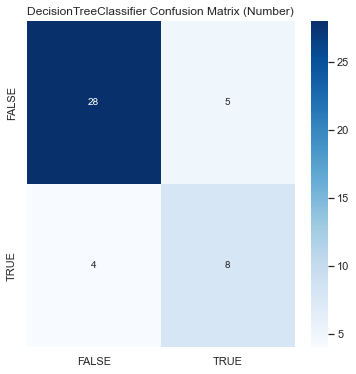

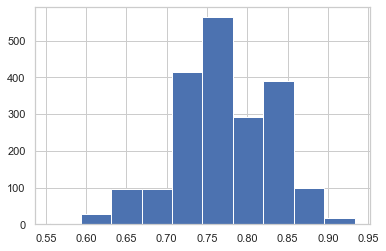

Best Score: 0.9333333333333333
Mean Score: 0.7700888888888889


In [139]:
clf_default = DecisionTreeClassifier(random_state=0) 

result(clf_default)
sample_result(None,"gini", None, None, None, 2) #default setting results.

Accuracy Score: 0.8444
Decision Tree Classifier f1-score      : 0.6957
Decision Tree Classifier precision     : 0.7273
Decision Tree Classifier recall        : 0.6667
Decision Tree Classifier roc auc score : 0.7879

               precision    recall  f1-score   support

           0       0.91      0.88      0.90        34
           1       0.67      0.73      0.70        11

    accuracy                           0.84        45
   macro avg       0.79      0.80      0.80        45
weighted avg       0.85      0.84      0.85        45



<Figure size 432x432 with 0 Axes>

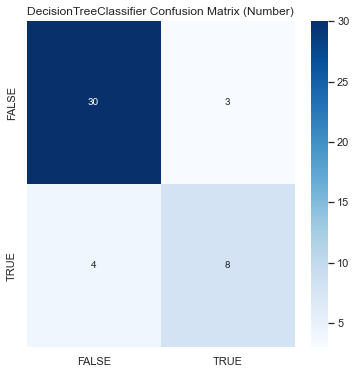

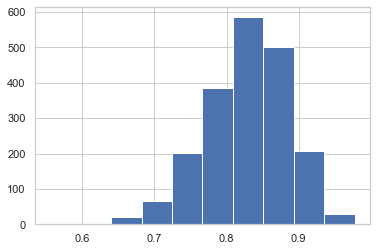

Best Score: 0.9777777777777777
Mean Score: 0.8313444444444447


In [140]:
clf = DecisionTreeClassifier(
    class_weight="balanced",
    criterion="gini",
    max_depth=1,
    max_leaf_nodes=2,
    min_samples_split=0.001,
    random_state=0
)

result(clf)
sample_result("balanced","gini", 1, None, 2, 0.001) # Optimized model results.

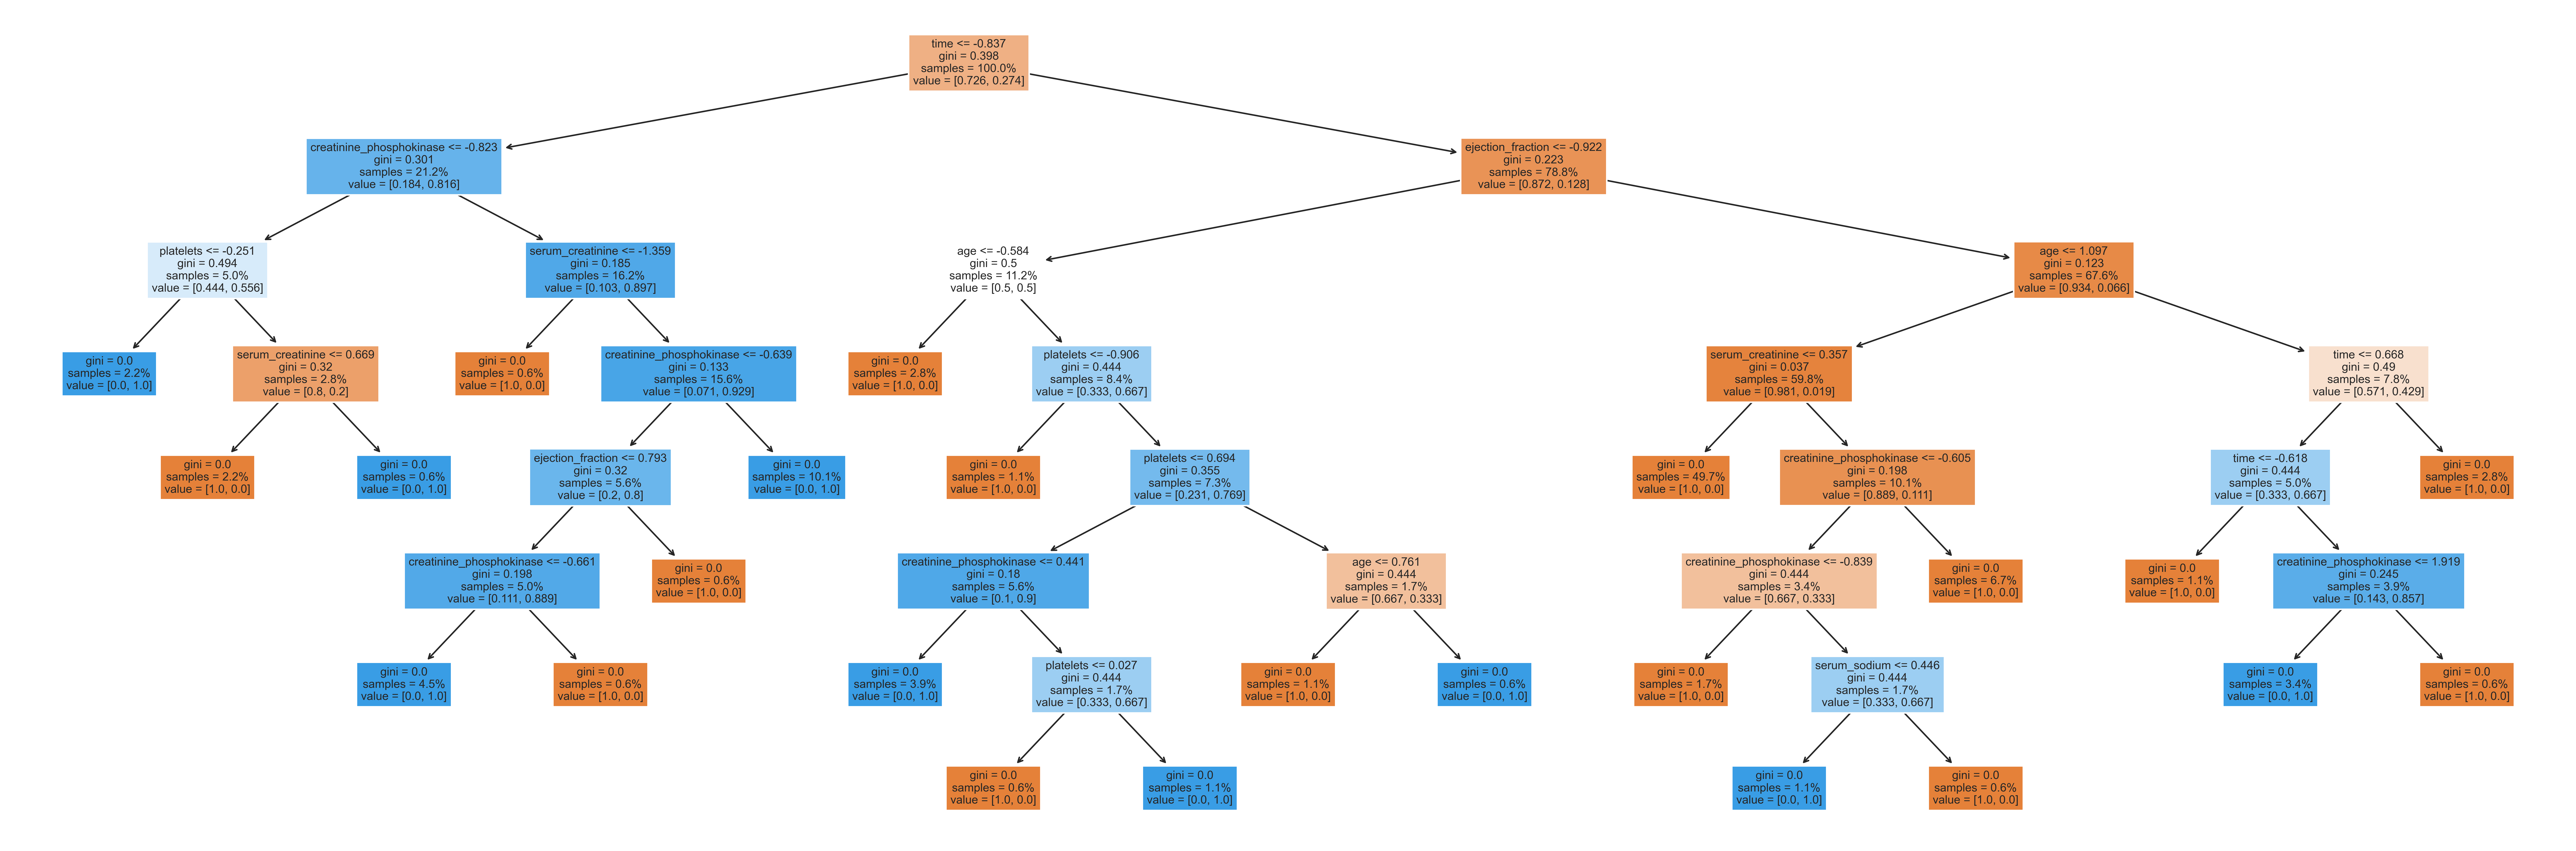

[CV] END class_weight=None, criterion=entropy, max_depth=7, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=7, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=7, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=7, max_leaf_nodes=2, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=7, max_leaf_nodes=2, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=7, max_leaf_nodes=2, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=7, max_leaf_nodes=2, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=7, max_leaf_nodes=2, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, criterio

[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=0.01; total time=   0.0s
[CV] END class_weight=None, criterion=entropy, max_depth=6, max_leaf_nodes=9, min_samples_split=0.1; total time=   0.0s
[CV] END class_weight=None, crite

In [141]:
plt.figure(figsize=(30,10), dpi=500)
tree_dot = plot_tree(clf_default, feature_names=num_col,proportion=True, filled = True)
plt.show()

### Miscellaneous Accuracy Check for Random Forest, AdaBoost, MLP
### Not Part of Report Analysis

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df_1.drop("DEATH_EVENT",axis=1),df_1.DEATH_EVENT , test_size=0.25, random_state=111)

### Random Forest

In [19]:
clf2 = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=111)
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
print('RF accuracy: ',accuracy_score(y_test, y_pred))

RF accuracy:  0.8169014084507042


### Hyper parameter tunning of Random Forest

In [20]:
rf = RandomForestClassifier(oob_score=True)

In [21]:
n_estimators = np.arange(2,10)
min_samples_split = [15,20,25]
max_depth = [2,3,4,5,6]
max_features = ['auto','sqrt']
criterion = ['gini','entropy']
bootstrap = [True, False]

In [22]:
param_rf = {'n_estimators':n_estimators,
            'min_samples_split':min_samples_split,
            'max_depth':max_depth,
            'max_features':max_features,
            'criterion':criterion,
            'bootstrap':bootstrap}

In [23]:
rf_random = RandomizedSearchCV(rf,param_distributions=param_rf,n_iter=20,cv=5,random_state=111,n_jobs=-1)

In [24]:
rf_random.fit(x_train,y_train)

/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/smriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [15, 20, 25],
                                        'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=111)

In [25]:
rf_random.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=25,
                       n_estimators=8, oob_score=True)

In [26]:
rf_random.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [27]:
print('RF accuracy: ',accuracy_score(y_test, rf_random.predict(x_test)))

RF accuracy:  0.8028169014084507


### Ada Boost

In [28]:
clf3 = AdaBoostClassifier(n_estimators=100)
clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print('AdaBoost accuracy: ',accuracy_score(y_test, y_pred))


AdaBoost accuracy:  0.7183098591549296


### MLP

In [30]:
Mlp = MLPClassifier( hidden_layer_sizes=(100,50,20), activation='relu', max_iter=500, random_state=111)
print(Mlp)
Mlp.fit(x_train,y_train)
Mlp.score(x_test,y_test)

MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=500, random_state=111)


0.6338028169014085